<a href="https://colab.research.google.com/github/schaidez2727/MAT-421/blob/main/ModuleH2_MAT421_Chaidez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module H_2 (HW 11) - MAT 421 #
#### Santana Chaidez ####

____
## Numerical Error and Instability ##
___

* **Recall**: differential equations for systems must often be solved via approximation with a **numerical solution**
* For instance, the Euler Method **integrates** the solution of an ODE
* Two main issues to consider with regards to integration schemes for ODEs: **accuracy** and **stability**
* **Accuracy** = a scheme's ability to get close to the exact solution, as a function of the step size h --> often notated as $O(h^p)$
* **Stability** = ability to keep the error from growing as the scheme integrates forward in time
* Stable = error does not grow; scheme is unstable otherwise

Following example uses Python to ilustrate accuracy and stability issues through the use of Explicit Euler, Implicit Euler, and Trapezoidal approximation formulas to solve an ODE:

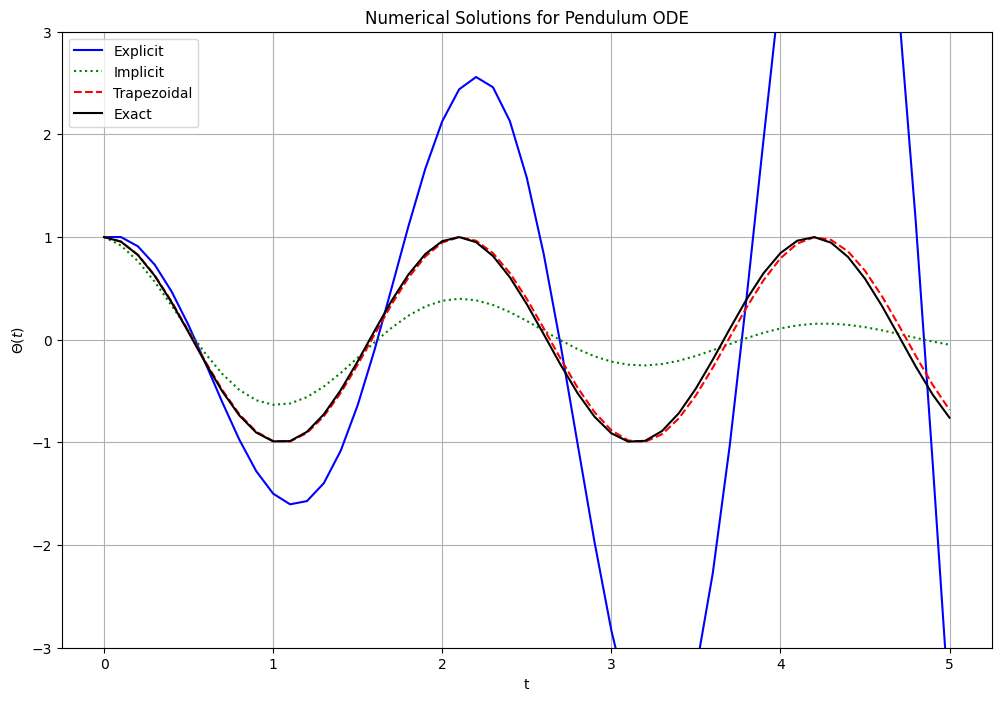

In [4]:
# Using Euler Explicit, Euler Implicit, and Trapezoidal Formulas to solve pendulum equation
# Parameters: sqrt(g/l) = 4 where l is length of pendulum and g is vertical gravity

import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
%matplotlib inline

h = 0.1                   # step size
t = np.arange(0, 5.1, h)  # numerical grid -> time interval [0, 5]
w = 3                     # pendulum oscillation frequency
s0 = np.array([[1], [0]]) # initial solution

# 3 formulas: _e = Explicit Euler, _i = Implicit Euler, _t = Trapezoidal

# defining coefficient matrix using system parameters
m_e = np.array([[1, h], [-w**2*h, 1]])
m_i = inv(np.array([[1, -h], [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2], [w**2*h/2,1]])), np.array([[1,h/2], [-w**2*h/2, 1]]))

# establishing state solutions matrix
s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# perform integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

# computing state solutions
for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])

# plot solutions
plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-') # Explicit Euler approx. solution
plt.plot(t,s_i[:,0],'g:') # Implicit Euler approx. solution
plt.plot(t,s_t[:,0],'r--') # Trapezoidal Formula approx. solution
plt.plot(t, np.cos(w*t), 'k') # Exact solution: theta(t) = cos(wt)
plt.ylim([-3, 3]) ; plt.xlabel('t') ; plt.ylabel('$\Theta(t)$')
plt.title('Numerical Solutions for Pendulum ODE')
plt.legend(['Explicit', 'Implicit', 'Trapezoidal', 'Exact'])
plt.grid() ; plt.show()

* Above plot compares the numerical solutions for the pendulum ODE problem computed using different formulas
* Unstable nature observed for the Explicit Euler scheme
* Inaccuracy observed for Implicit Euler scheme, which displays exponential decay
* Relative accuracy and stability for Trapezoidal method, which closely resembles the exact solution apart from a small phase shift as time increases

____
## Predictor-Corrector and Runge Kutta Methods ##
___

**Predictor-Corrector Methods**:
* Recall: change of state $\frac{dS(t)}{dt}$ returned by function $F(t, S(t))$
* **Predictor-Corrector Methods**: Methods of solving IVPs that improve the approxiamtion accuracy of other methods by querying F function several times at different locations (*predictions*), then using a weighted average of the results (*corrections*) to update the state
* **Predictor**: explicit formula that first estimates the solution at $t_{j+1}$ --> can use methods such as Euler method to complete this step and obtain the solution $S(t_{j+1})$
* **Corrector**: applied to this solution to improve accuracy --> calculates a new, more accurate solution

--> Example - **Midpoint Method**:
* Predictor Step = prediction of solution value midway between $t_{j}$ and $t_{j+1}$:
* $S(t_j+\frac{h}{2})=S(t_j)+\frac{h}{2}F(t_j, S(t_j))$
* Corrector Step = computes the solution at $S(t_{j+1})$ from $S(t_{j})$, but using the derivative from $S(t_j+\frac{h}{2})$:
* $S(t_{j+1})=S(t_j)+hF(t_j+\frac{h}{2}, S(t_j+\frac{h}{2}))$

**Runge Kutta (RK) Methods**
* One of the most common methods for solving ODEs
* Based on truncated Taylor series to get a more accurate solution without requiring the computation of the higher derivatives in the series
* Done by defining the equation with parameters
* **Second-Order RK Method**: $S(t_{j+1})=S(t_j)+\frac{1}{2}(k_1+k_2)h$, where $k_1=F(t_j, S(t_j))$ & $k_2=F(t_j+ph, S(t_j)+qhk_1)$
* **Fourth-Order RK Method (RK4)**: $S(t_{j+1})=S(t_j)+\frac{h}{6}(k_1+2k_2+2k_3+k_4)$, where $k_1=F(t_j, S(t_j))$, $k_2=F(t_j+\frac{h}{2}, S(t_j)+\frac{1}{2}k_1h)$, $k_3=F(t_j+\frac{h}{2}, S(t_j)+\frac{1}{2}k_2h)$, & $k_4=F(t_j+h, S(t_j)+k_3h)$
* RK4 --> accuracy $O(h^4)$; uses weighted average of four points to approximate the solution

____
## Python ODE Solvers ##
___

SciPy is a Python library that contains several built-in functions for solving IVPs! Let's see some examples below.

Most common function:

```
# using example inputs:
solve_ivp(fun, t_span, s0, method = 'RK45', t_eval=None)
```



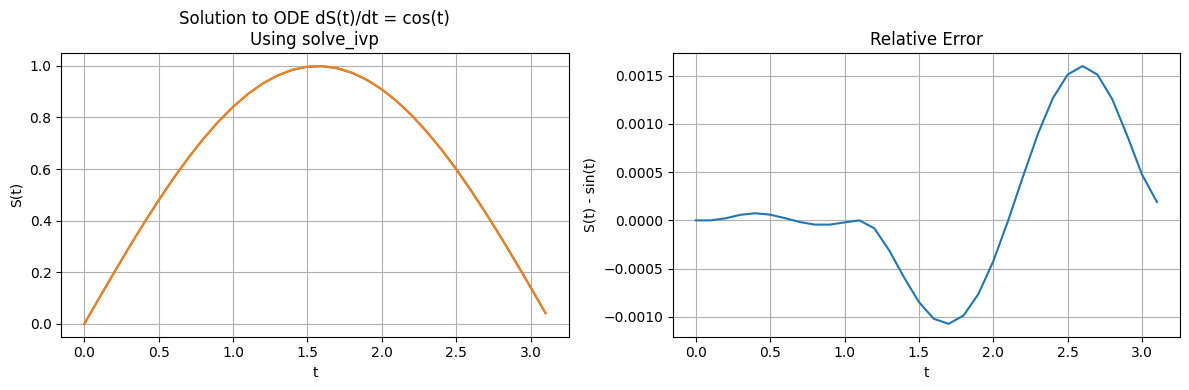

In [8]:
# Using Python to solve the ODE dS(t)/dt = cos(t) as an IVP
# initial value S_0 = 0, interval of [0, pi], exact solution S(t) = sin(t)

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
%matplotlib inline

# Define function and differential equation
F = lambda t, s: np.cos(t)
t_eval = np.arange(0, np.pi, 0.1)

# Solve ODE using SciPy function
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

# Plot solution
plt.figure(figsize = (12, 4))
p_sol = plt.subplot(121)
p_sol.set_title("Solution to ODE dS(t)/dt = cos(t)\nUsing solve_ivp")
plt.plot(sol.t, sol.y[0]) # scipy solution
plt.plot(sol.t, np.sin(sol.t)) # exact solution
plt.xlabel('t') ; plt.ylabel('S(t)') ; plt.grid()

# Plot relative error
p_error = plt.subplot(122)
p_error.set_title("Relative Error")
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t') ; plt.ylabel('S(t) - sin(t)')
plt.tight_layout() ; plt.grid()
plt.show()

The above figure displays the accuracy of the function solve_ivp in approximating the solution to the ODE.

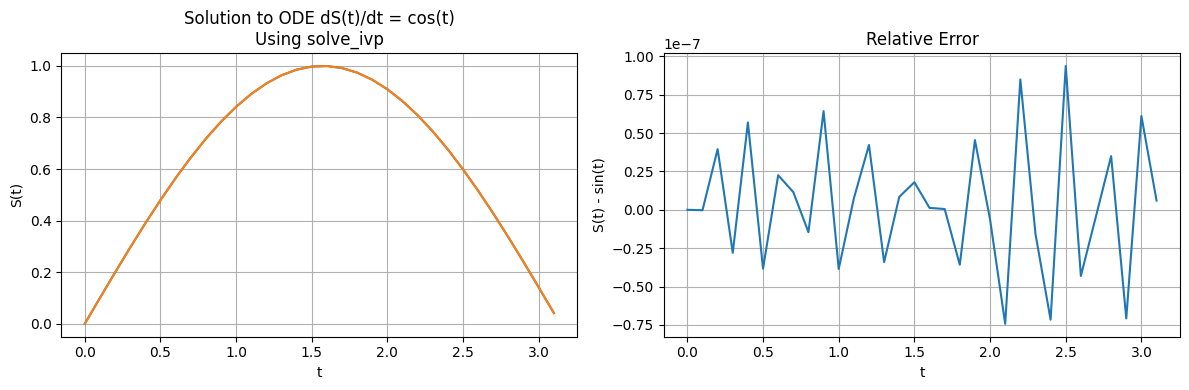

In [9]:
# Using Python to control the relative and absolute tolerances with arguments rtol and atol
# Keep difference b/w approximate and exact solution less than 1E-7

sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval, rtol = 1e-8, atol = 1e-8)

# Plot solution
plt.figure(figsize = (12, 4))
p_sol = plt.subplot(121)
p_sol.set_title("Solution to ODE dS(t)/dt = cos(t)\nUsing solve_ivp")
plt.plot(sol.t, sol.y[0]) # scipy solution
plt.plot(sol.t, np.sin(sol.t)) # exact solution
plt.xlabel('t') ; plt.ylabel('S(t)') ; plt.grid()

# Plot relative error
p_error = plt.subplot(122)
p_error.set_title("Relative Error")
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t') ; plt.ylabel('S(t) - sin(t)')
plt.tight_layout() ; plt.grid()
plt.show()